In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib notebook

In [3]:
# Import data
xtrain = pd.read_csv("task1/X_train.csv")
ytrain = pd.read_csv("task1/y_train.csv")

In [4]:
print(xtrain.shape)
xtrain.head()

(1212, 833)


,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
0,0.0,10.891876,832442.812375,20585.544083,1028.369495,1.163780e+06,9.199135,597900.477629,NaN,1.144294e+06,...,1.024198e+06,-855.549602,12176.073427,10.647729,10.916371,1220.065443,8.566724,1.036263e+06,85338.558539,103088.664210
1,1.0,11.512994,832442.898114,NaN,1012.624877,1.028911e+06,10.906408,597900.458612,8127.016078,1.099166e+06,...,1.086806e+06,-787.397942,10493.095660,10.586492,9.463962,917.094909,10.231822,1.007163e+06,95695.020645,105161.109422
2,2.0,11.052185,832442.896307,20585.512844,1003.953827,9.231756e+05,9.212979,597900.426764,10738.092422,1.027863e+06,...,1.018533e+06,-906.997242,10959.516944,10.769287,10.342160,637.027802,10.705461,1.019955e+06,80253.299882,104177.051666
3,3.0,11.642076,NaN,NaN,1004.672084,9.459461e+05,9.553420,597900.450367,13524.096973,1.168144e+06,...,1.047017e+06,-1011.742516,16845.309819,10.483830,10.594941,1114.069590,10.321063,1.085442e+06,NaN,102746.516920
4,4.0,10.407121,832442.831424,20585.557007,NaN,9.957182e+05,8.419164,597900.423639,12894.065081,1.063199e+06,...,1.031009e+06,-1025.223865,18348.460040,NaN,NaN,1230.088215,10.250096,1.024812e+06,101815.745499,105163.749149


In [5]:
print(xtrain.isnull().sum())  

id        0
x0       94
x1       98
x2       95
x3      106
       ... 
x827    103
x828     97
x829    100
x830     88
x831    121
Length: 833, dtype: int64


In [6]:
ytrain.head()

,id,y
0,0.0,71.0
1,1.0,73.0
2,2.0,66.0
3,3.0,55.0
4,4.0,67.0


<IPython.core.display.Javascript object>


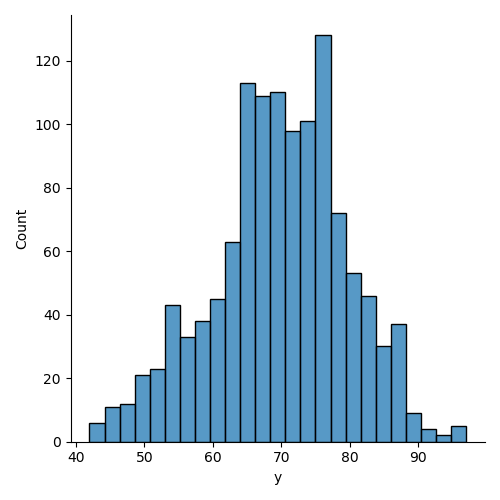

In [7]:
sns.displot(ytrain, x="y")

<IPython.core.display.Javascript object>


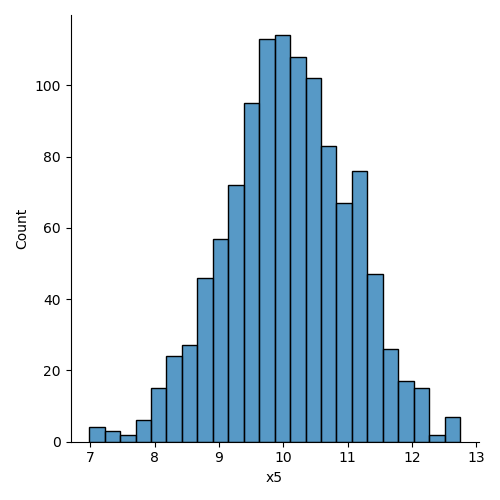

In [14]:
sns.displot(xtrain, x="x5")

In [49]:
Cx = xtrain.iloc[:, :200].corr()

In [50]:
Cx.values.shape

(200, 200)

In [51]:
mask = np.triu(np.ones_like(Cx.values, dtype=bool))


<IPython.core.display.Javascript object>


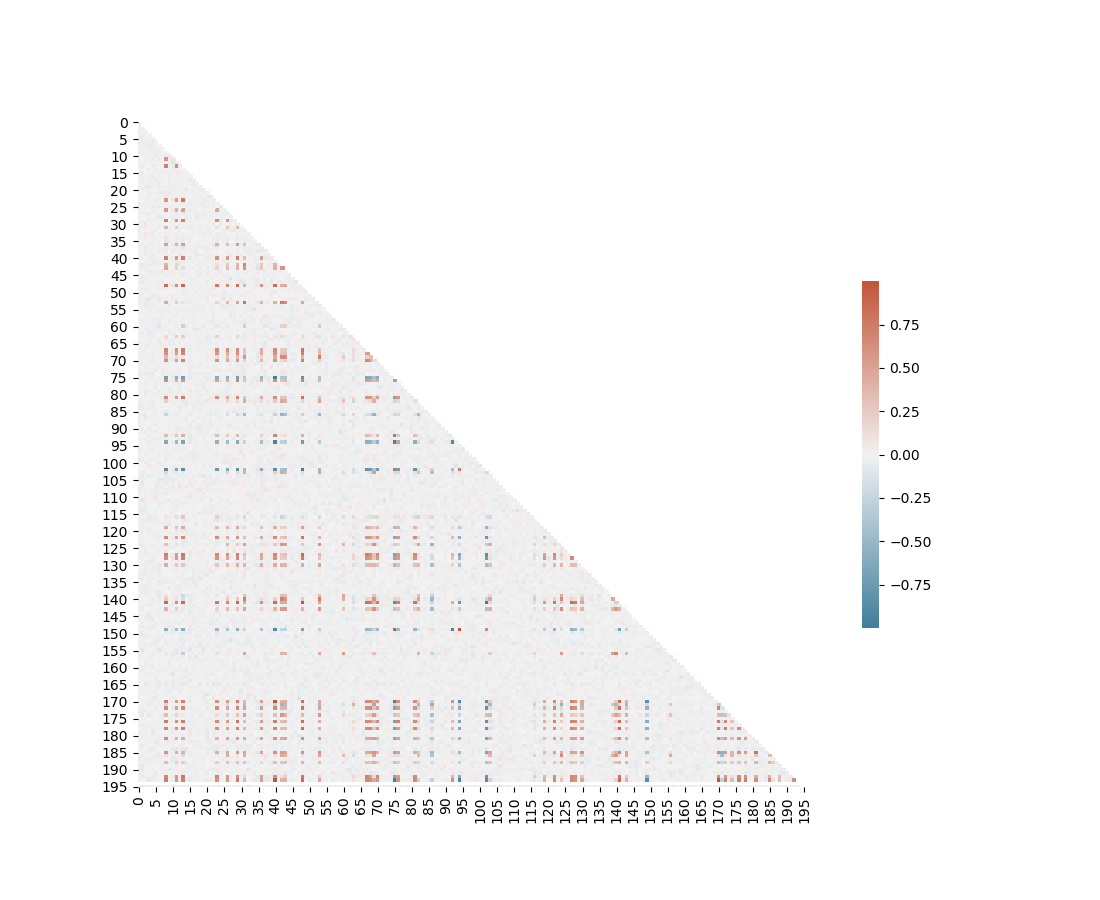

In [52]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(Cx.values, mask=mask, center=0, cmap=cmap,
            square=True, linewidths=0, cbar_kws={"shrink": .5})

,id,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x822,x823,x824,x825,x826,x827,x828,x829,x830,x831
id,1.000000,-0.032838,-0.011303,-0.025924,0.003326,0.010467,-0.054850,0.022430,-0.016390,0.033554,...,-0.039729,-0.003947,-0.000597,-0.031291,0.023046,-0.017082,0.004003,-0.011399,0.027489,-0.030415
x0,-0.032838,1.000000,-0.023199,-0.004880,-0.045117,-0.061763,0.025206,-0.045073,0.011291,0.038935,...,0.016189,0.000664,-0.009664,0.056458,0.009684,-0.002415,-0.020588,0.033861,0.045806,-0.039709
x1,-0.011303,-0.023199,1.000000,-0.022921,-0.017197,0.006134,0.029507,-0.024340,0.021017,-0.020324,...,0.001836,-0.000368,-0.004301,-0.019733,0.040913,-0.001780,-0.021977,0.012041,0.001878,-0.001490
x2,-0.025924,-0.004880,-0.022921,1.000000,0.000391,0.021406,0.021431,-0.068577,0.030814,-0.011900,...,-0.048289,-0.016201,0.060890,-0.066622,0.039324,-0.001286,0.033245,-0.024872,-0.000728,-0.010920
x3,0.003326,-0.045117,-0.017197,0.000391,1.000000,-0.029628,0.056451,-0.043318,-0.032591,0.019741,...,-0.011724,0.050894,-0.044753,-0.010421,-0.023610,-0.050420,-0.049856,-0.001862,0.031508,-0.039586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x827,-0.017082,-0.002415,-0.001780,-0.001286,-0.050420,-0.032297,0.023751,-0.006299,0.615151,0.035729,...,0.030040,-0.405163,0.498981,-0.055771,0.001113,1.000000,-0.022639,0.026626,-0.070441,-0.010494
x828,0.004003,-0.020588,-0.021977,0.033245,-0.049856,0.013963,0.011717,-0.006362,-0.045717,0.056480,...,0.048125,-0.003107,0.021657,-0.002702,-0.031945,-0.022639,1.000000,-0.002855,0.015340,0.016293
x829,-0.011399,0.033861,0.012041,-0.024872,-0.001862,-0.022114,-0.021409,0.036357,0.001695,-0.046115,...,-0.005875,-0.024037,0.032947,0.005667,-0.002570,0.026626,-0.002855,1.000000,-0.034761,-0.030466
x830,0.027489,0.045806,0.001878,-0.000728,0.031508,-0.003701,-0.007322,-0.004729,-0.055488,0.004294,...,-0.004204,0.057029,-0.051126,0.044780,-0.038130,-0.070441,0.015340,-0.034761,1.000000,0.027448
